In [66]:
import os
from scipy.cluster.hierarchy import dendrogram
import plotly.figure_factory as ff
import time
from matplotlib.pyplot import MultipleLocator
import  matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn import metrics
import re 
import string
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Path

In [67]:
DATAPATH = './dataset/mini_newsgroups/'

# Data preprocessing

## Data preprocessing - Load data

In [68]:
label = []
texts = []
count = 0
for j in os.listdir(DATAPATH):
    for k in os.listdir(DATAPATH + j):
        f = open(DATAPATH + str(j) + '/' + str(k), encoding='latin-1')
        t = f.read()
        print(t)
        print('-----')
        i = t.find('writes:')  # skip header
        if 0 < i:
            t = t[i:]
        t = t.replace('writes:', '')
        texts.append(t)
        label.append(count)
        f.close()
    count += 1

Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51121 soc.motss:139944 rec.scouting:5318
Newsgroups: alt.atheism,soc.motss,rec.scouting
Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!fs7.ece.cmu.edu!europa.eng.gtefsd.com!howland.reston.ans.net!wupost!uunet!newsgate.watson.ibm.com!yktnews.watson.ibm.com!watson!Watson.Ibm.Com!strom
From: strom@Watson.Ibm.Com (Rob Strom)
Subject: Re: [soc.motss, et al.] "Princeton axes matching funds for Boy Scouts"
Sender: @watson.ibm.com
Message-ID: <1993Apr05.180116.43346@watson.ibm.com>
Date: Mon, 05 Apr 93 18:01:16 GMT
Distribution: usa
References: <C47EFs.3q47@austin.ibm.com> <1993Mar22.033150.17345@cbnewsl.cb.att.com> <N4HY.93Apr5120934@harder.ccr-p.ida.org>
Organization: IBM Research
Lines: 15

In article <N4HY.93Apr5120934@harder.ccr-p.ida.org>, n4hy@harder.ccr-p.ida.org (Bob McGwier) writes:

|> [1] HOWEVER, I hate economic terrorism and political correctness
|> worse than I hate this policy.  


|> [2] A more effective approach is to stop


-----
Newsgroups: comp.os.ms-windows.misc
Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!usc!venice!gumby.dsd.trw.com!deneva!anthrax!reimert
From: reimert@anthrax.etdesg.trw.com (Scott P. Reimert)
Subject: Re: win/NT file systems
Message-ID: <2BDD7481.6A2C@deneva.sdd.trw.com>
Sender: news@deneva.sdd.trw.com
Organization: TRW Inc., Redondo Beach, CA
References: <1993Apr26.103230.10618@spider.co.uk>
Date: Tue, 27 Apr 93 17:59:28 GMT
Lines: 26

In article <1993Apr26.103230.10618@spider.co.uk> keiths@spider.co.uk (Keith Smith) writes:
>OK will some one out there tell me why / how DOS 5
>can read (I havn't tried writing in case it breaks something)
>the Win/NT NTFS file system.
>I thought NTFS was supposed to be better than the FAT system
>
>keith

DOS 5.0/6.0 cannot read the NTFS file system, although the NTFS file system
can read the FAT file system of DOS.  I have WindowsNT on a seperate
partition on my machine at 

-----
Newsgroups: misc.forsale
Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!wupost!zaphod.mps.ohio-state.edu!sol.ctr.columbia.edu!ira.uka.de!yale.edu!newsserver.jvnc.net!erenj.com!rufus.erenj.com!srfergu
From: srfergu@rufus.erenj.com (Scott Ferguson)
Subject: Re: What's wrong with this picture?
Message-ID: <1993Apr5.203212.28284@erenj.com>
Sender: news@erenj.com (ERE News System)
Nntp-Posting-Host: rufus.erenj.com
Organization: Exxon Research & Engineering Co.
References:  <1993Apr3.152922.12050@iscsvax.uni.edu>
Date: Mon, 5 Apr 1993 20:32:12 GMT
Lines: 20

In article <1993Apr3.152922.12050@iscsvax.uni.edu>, harter5255@iscsvax.uni.edu writes:
|> Fellow netters,
|> 
|> Is anybody awake out there?  When someone posted a message telling people to
|> stop posting computer ads to the misc.forsale group, he got about thirty
|> response here, not to mention the rash of E-Mail I'm sure he received.  Yet,
|> another person posts a message with the subject line "blow me" and an even 
|> worse 

-----
Newsgroups: rec.sport.baseball
Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!howland.reston.ans.net!usenet.ins.cwru.edu!magnus.acs.ohio-state.edu!csn!boulder!news
From: davewood@bruno.cs.colorado.edu (David Rex Wood)
Subject: Re: BOB KNEPPER WAS DAMN RIGHT!
Message-ID: <1993Apr19.041920.27489@colorado.edu>
Sender: news@colorado.edu (The Daily Planet)
Nntp-Posting-Host: bruno.cs.colorado.edu
Organization: University of Colorado, Boulder
References: <1993Apr19.035406.11473@news.yale.edu>
Date: Mon, 19 Apr 1993 04:19:20 GMT
Lines: 24

In article <1993Apr19.035406.11473@news.yale.edu> (Austin Jacobs) writes:
>Don't you GUYS think so?  I mean, c'mon!  What the heck are women doing
>even THINKING of getting into baseball.  They cause so many problems.  Just
>look at Lisa Olson.  Remember that feisty reporter that entered the New
>England Patriots locker room?  She started crying like a LITTLE GIRL!  I
>just don't think women belong in a man's sport.  Before you smar

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [69]:
texts[0]

'\n\n|> [1] HOWEVER, I hate economic terrorism and political correctness\n|> worse than I hate this policy.  \n\n\n|> [2] A more effective approach is to stop donating\n|> to ANY organizating that directly or indirectly supports gay rights issues\n|> until they end the boycott on funding of scouts.  \n\nCan somebody reconcile the apparent contradiction between [1] and [2]?\n\n-- \nRob Strom, strom@watson.ibm.com, (914) 784-7641\nIBM Research, 30 Saw Mill River Road, P.O. Box 704, Yorktown Heights, NY  10598\n'

In [70]:
len(texts)

2000

In [71]:
np_label = np.array(label)

In [72]:
np_label

array([ 0,  0,  0, ..., 19, 19, 19])

## Data preprocessing -  Convert text to lowercase

In [73]:
lowerCase = []

for i in texts:
    lowerCase.append(i.lower())

In [74]:
lowerCase

['\n\n|> [1] however, i hate economic terrorism and political correctness\n|> worse than i hate this policy.  \n\n\n|> [2] a more effective approach is to stop donating\n|> to any organizating that directly or indirectly supports gay rights issues\n|> until they end the boycott on funding of scouts.  \n\ncan somebody reconcile the apparent contradiction between [1] and [2]?\n\n-- \nrob strom, strom@watson.ibm.com, (914) 784-7641\nibm research, 30 saw mill river road, p.o. box 704, yorktown heights, ny  10598\n',
 "\n\n>>then why do people keep asking the same questions over and over?\n>because you rarely ever answer them.\n\nnope, i've answered each question posed, and most were answered multiple\ntimes.\n\nkeith\n",
 "\n\n>>>how long does it [the motto] have to stay around before it becomes the\n>>>default?  ...  where's the cutoff point? \n>>i don't know where the exact cutoff is, but it is at least after a few\n>>years, and surely after 40 years.\n>why does the notion of default not

## Data preprocessing -  Remove Number

In [75]:
removeNumber = []

for i in lowerCase:
    removeNumber.append(re.sub(r'\d+', '', i))

In [76]:
removeNumber

['\n\n|> [] however, i hate economic terrorism and political correctness\n|> worse than i hate this policy.  \n\n\n|> [] a more effective approach is to stop donating\n|> to any organizating that directly or indirectly supports gay rights issues\n|> until they end the boycott on funding of scouts.  \n\ncan somebody reconcile the apparent contradiction between [] and []?\n\n-- \nrob strom, strom@watson.ibm.com, () -\nibm research,  saw mill river road, p.o. box , yorktown heights, ny  \n',
 "\n\n>>then why do people keep asking the same questions over and over?\n>because you rarely ever answer them.\n\nnope, i've answered each question posed, and most were answered multiple\ntimes.\n\nkeith\n",
 "\n\n>>>how long does it [the motto] have to stay around before it becomes the\n>>>default?  ...  where's the cutoff point? \n>>i don't know where the exact cutoff is, but it is at least after a few\n>>years, and surely after  years.\n>why does the notion of default not take into account changes

## Data preprocessing -  Remove Punctuation

In [77]:

removeP = []
punc = '''!()-[]{}|;:'"\,<>./?@#$%^&*_~'''
for i in removeNumber:
    new = ""
    for ele in i:  
        if ele not in punc:  
            new = new + ele
    removeP.append(new)

## Data preprocessing -  Remove Stop Wrods

In [79]:
from gensim.parsing.preprocessing import remove_stopwords
removeStopWords = []
for i in removeP:
    removeStopWords.append(remove_stopwords(i))

In [80]:
print(removeStopWords)

['hate economic terrorism political correctness worse hate policy effective approach stop donating organizating directly indirectly supports gay rights issues end boycott funding scouts somebody reconcile apparent contradiction rob strom stromwatsonibmcom ibm research saw river road po box yorktown heights ny', 'people asking questions rarely answer nope ive answered question posed answered multiple times keith', 'long motto stay default wheres cutoff point dont know exact cutoff years surely years notion default account changes population makeup specifically changes talking arguing motto interpreted offensive larger portion population years ago keith', 'dont know capital punishment wrong isnt shooting better analogy continue drive car realizing sooner later going killed automobile accident know people killed result driving continue uh uh know killing im sure id drive car sufficient evidence conclude necessarily kill lifetime yes thinks thinks going cause involved fatal accident likeli

## Data preprocessing -  Vectorize

In [81]:
vectorizer = TfidfVectorizer(max_df=0.5,
                             min_df=2,
                             stop_words='english')


X = vectorizer.fit_transform(removeStopWords)

In [82]:
import pandas as pd

In [83]:
r = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())

In [109]:
r.iloc[108:113,1510:1525]

bir  bird  birds  birth  birthday  bis  bishop       bit  bitch  bites  \
108  0.0   0.0    0.0    0.0       0.0  0.0     0.0  0.186551    0.0    0.0   
109  0.0   0.0    0.0    0.0       0.0  0.0     0.0  0.000000    0.0    0.0   
110  0.0   0.0    0.0    0.0       0.0  0.0     0.0  0.000000    0.0    0.0   
111  0.0   0.0    0.0    0.0       0.0  0.0     0.0  0.000000    0.0    0.0   
112  0.0   0.0    0.0    0.0       0.0  0.0     0.0  0.104231    0.0    0.0   

     bitmap  bitmapped  bitmaps  bitnet      bits  
108     0.0        0.0      0.0     0.0  0.000000  
109     0.0        0.0      0.0     0.0  0.000000  
110     0.0        0.0      0.0     0.0  0.000000  
111     0.0        0.0      0.0     0.0  0.000000  
112     0.0        0.0      0.0     0.0  0.154641

# Purity Score

In [85]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

# K-mean Clustering

In [86]:
start_time = time.time()


#clustering
km = KMeans(n_clusters=20, init='k-means++')

km.fit(X)

end_time = time.time()

In [87]:
#Performance
print("Purity: %0.3f" % purity_score(np_label, km.labels_))
print("--- %s seconds ---" % (end_time - start_time))

Purity: 0.436
--- 15.407756805419922 seconds ---


# Hierarchical Clustering

In [88]:
start_time = time.time()
hc = AgglomerativeClustering(n_clusters=20)
hc.fit(X.toarray())
end_time = time.time()

In [89]:
print("Purity: %0.3f" % purity_score(np_label, hc.labels_))
print("--- %s seconds ---" % (end_time - start_time))

Purity: 0.328
--- 35.71975374221802 seconds ---


In [90]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)


In [91]:
hc_full = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hc_full.fit(X.toarray())

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

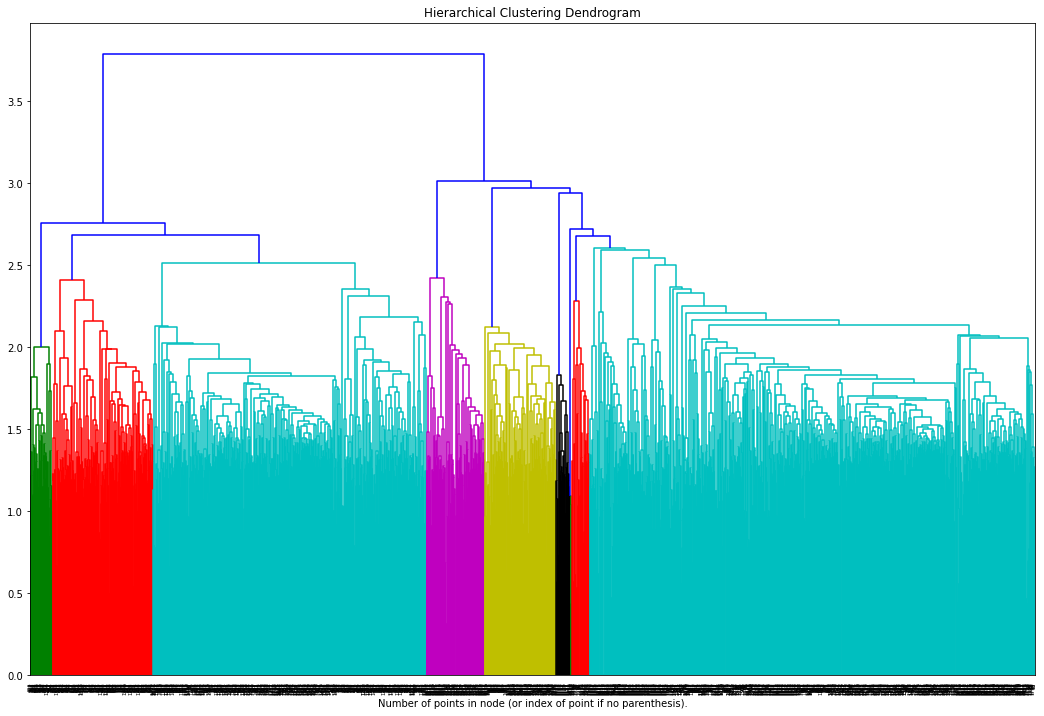

In [92]:
plt.figure(figsize=(18,12))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(hc_full, truncate_mode=None)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.show()

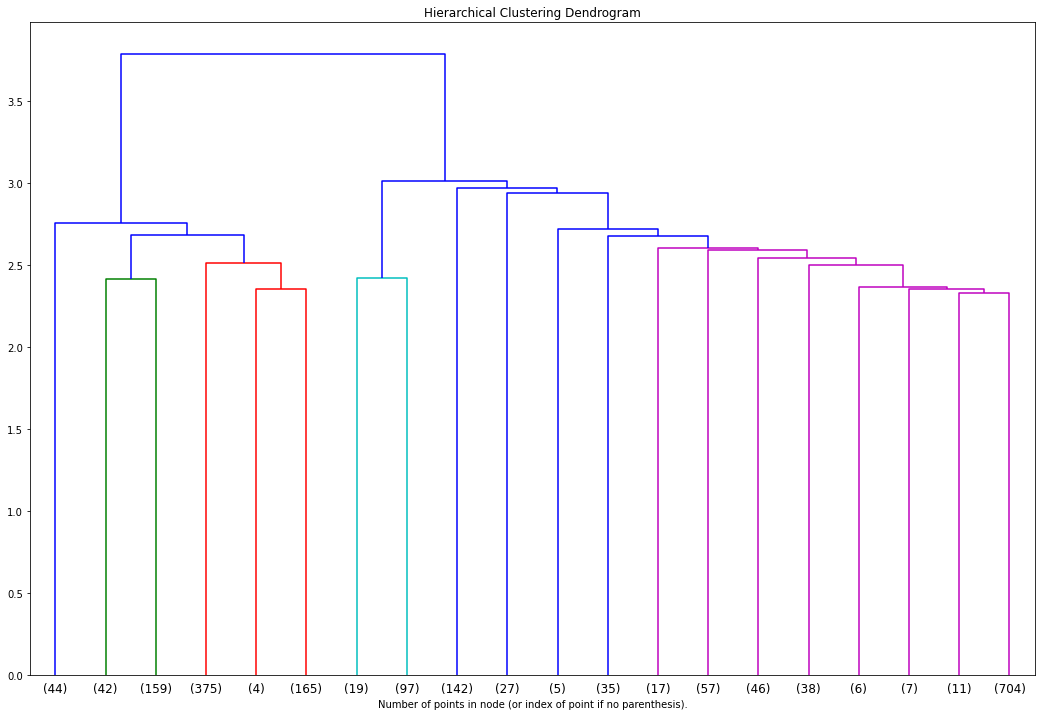

In [93]:
plt.figure(figsize=(18,12))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(hc_full, truncate_mode='lastp', p=20)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.show()


# DBSCAN

In [94]:
import pandas as pd

res = []

for eps in np.arange(0.05,1,0.005):
    for min_samples in range(2,10):
        start_time = time.time()
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        dbscan.fit(X)
        end_time = time.time()
        n_clusters = len([i for i in set(dbscan.labels_) if i != -1])
        outliners = np.sum(np.where(dbscan.labels_ == -1, 1,0))
        stats = str(pd.Series([i for i in dbscan.labels_ if i != -1]).value_counts().values)
        res.append({'eps':eps,'min_samples':min_samples,'n_clusters':n_clusters,'outliners':outliners,'stats':stats, 'purity':purity_score(np_label, dbscan.labels_), 'time': (end_time - start_time)})     
df = pd.DataFrame(res)

df.loc[df.n_clusters == 20, :]
df

D:\anaconda\envs\CV2\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



eps  min_samples  n_clusters  outliners              stats  purity  \
0     0.050            2           8       1984  [2 2 2 2 2 2 2 2]   0.054   
1     0.050            3           0       2000                 []   0.050   
2     0.050            4           0       2000                 []   0.050   
3     0.050            5           0       2000                 []   0.050   
4     0.050            6           0       2000                 []   0.050   
...     ...          ...         ...        ...                ...     ...   
1515  0.995            5           1       1994                [6]   0.052   
1516  0.995            6           1       1994                [6]   0.052   
1517  0.995            7           0       2000                 []   0.050   
1518  0.995            8           0       2000                 []   0.050   
1519  0.995            9           0       2000                 []   0.050   

          time  
0     0.223176  
1     0.188293  
2     0.169035  
3     0.171015  
4     0.169006  
...        ...  
1515  0.167998  
1516  0.167005  
1517  0.167007  
1518  0.170003  
1519  0.167007  

[1520 rows x 7 columns]

In [95]:
df.loc[df.n_clusters == 20, :]

eps  min_samples  n_clusters  outliners  \
776  0.535            2          20       1959   
784  0.540            2          20       1959   
792  0.545            2          20       1959   
800  0.550            2          20       1959   
808  0.555            2          20       1959   

                                         stats  purity      time  
776  [3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]  0.0655  0.166945  
784  [3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]  0.0655  0.177372  
792  [3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]  0.0655  0.180813  
800  [3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]  0.0655  0.165999  
808  [3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]  0.0655  0.167972